In [49]:
import pandas as pd 
import numpy as np 


In [50]:
rawData = pd.read_csv("../DataSet/TP_2_datset_mushrooms.csv")

In [51]:
# Transformation des lettres en chiffres via LabelEncoder
from sklearn.preprocessing import LabelEncoder
labelEnc = LabelEncoder()
for column in rawData.columns:
    rawData[column] = labelEnc.fit_transform(rawData[column])

In [52]:
rawData

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [23]:
# la target étant la class cad la première colonne; on conserve toutes les colonnes sauf la première pour X et juste la première pour y
X = rawData.values[:, 1:]
#on ne garde que la première colonne pour y 
y = rawData.values[:, 0]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Basic Logistic Regression with neither Hyperparameters Or Regularisation 

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
from sklearn import metrics
y_prob = lr.predict_proba(X_test)
#ROC Curve
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_prob[:, 1])
#Aire under the curve. 
auc = metrics.auc(fpr, tpr)

Text(0, 0.5, 'True Positive Rate')

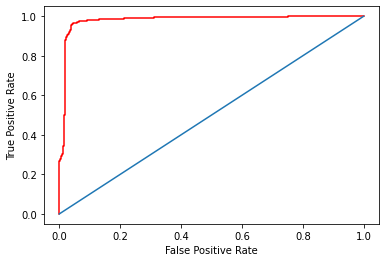

In [45]:
import matplotlib.pyplot as plt 
plt.plot(fpr, tpr, color="red")
#Ajout de la diagonale de 0.0 à 1.1
plt.plot([0,1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [46]:
print(auc)

0.9805568127936549


### Tuning de la regression logistique en testant plusieurs hyperparamètres via une GridSearch et une validation croisée

In [47]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [54]:
lrCV = LogisticRegression()
params = {"C": np.logspace(-3, 3, 7), "penalty": ["l1", "l2"] } 
lr_gs = GridSearchCV(lrCV, params, cv=10)
lr_gs.fit(X_train, y_train)

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueErr

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueErr

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative s

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative s

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative s

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative s

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative s

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative s

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [55]:
print(lr_gs.best_params_)

{'C': 100.0, 'penalty': 'l2'}


In [59]:
# On récupère la prédiction de la valeur positive
y_prob = lr_gs.predict_proba(X_test)[:,1] 

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_prob)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.9877493372559164


Text(0, 0.5, 'True Positive Rate')

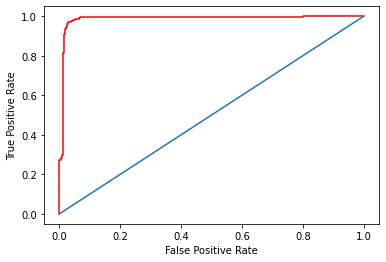

In [60]:
plt.plot(false_positive_rate, true_positive_rate, color="red")
#Ajout de la diagonale de 0.0 à 1.1
plt.plot([0,1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

### Classification Linéaire via un SVM 

In [61]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc 

In [63]:
svm = LinearSVC()
parameters = {"C": np.logspace(-3, 3, 7)}
lr_svm = GridSearchCV(svm, parameters, cv=10)
lr_svm.fit(X_train, y_train)

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

GridSearchCV(cv=10, estimator=LinearSVC(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

In [64]:
lr_svm.best_params_

{'C': 1.0}

In [66]:
Y_pred = lr_svm.predict(X_test)

In [67]:
Y_pred

array([1, 1, 0, ..., 1, 1, 0])

Text(0, 0.5, 'True Positive Rate')

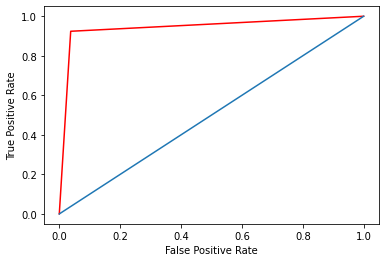

In [68]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, Y_pred)
plt.plot(false_positive_rate, true_positive_rate, color="red")
#Ajout de la diagonale de 0.0 à 1.1
plt.plot([0,1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [70]:
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
roc_auc

0.9432532113453166